In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("home_train.csv")
df[['area']]


,area
0,2600
1,3000
2,3200
3,3600
4,4000


Text(0, 0.5, 'price(US$)')

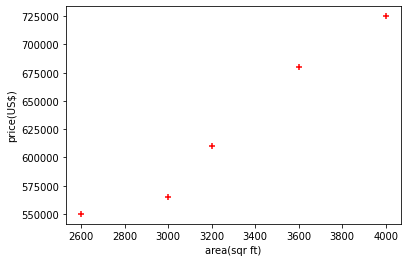

In [3]:
plt.scatter(df.area, df.price, color="red", marker="+")
plt.xlabel("area(sqr ft)")
plt.ylabel("price(US$)")

In [4]:
#so the distribution is suitable for linear regg
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)#training #first argument has to be 2d array 

LinearRegression()

In [5]:
reg.predict([[3300]])#reshape the point into 2d arrray as predict takes 2d array
#we can do like np.array([arr]).reshape(1,1) to make a 1d array into 2d array 

array([628715.75342466])

In [6]:
#for m value in y = mx + b is 
reg.coef_

array([135.78767123])

In [7]:
#for b intersept value 
reg.intercept_

180616.43835616432

In [8]:
d = pd.read_csv('areas_test.csv')
d

,area
0,1233
1,2312
2,2131
3,3131
4,5444
5,1333
6,5423
7,9786
8,9606
9,6374


In [9]:
p = reg.predict(d)

In [10]:
d['price'] = p

In [11]:
d.to_csv("home_price_prediction.csv", index=False)

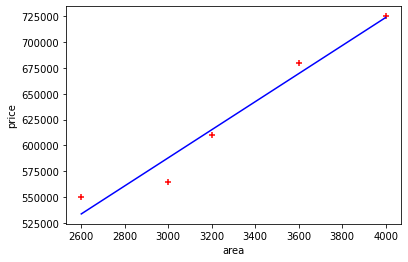

In [12]:
# show the y = mx + b line generated by training the model

plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color="red", marker="+")
plt.plot(df.area, reg.predict(df[['area']]), color="blue")

In [13]:
#saving the model
import pickle

In [14]:
with open("model_pickle", "wb") as f:
    pickle.dump(reg, f)

In [16]:
#loading th file
with open("model_pickle","rb") as r:
    model = pickle.load(r)
    

In [19]:
model.predict([[5000]])

array([859554.79452055])

In [23]:
#using joblib we dump and load
import joblib

In [24]:
joblib.dump(reg, "model_joblib")

['model_joblib']

In [25]:
mj = joblib.load('model_joblib')

In [26]:
mj.predict([[5000]])

array([859554.79452055])